# 웹 크롤링

## 브라우저의 역할

1. url을 입력받으면 서버 컴퓨터로 부터 다운받음 ( 통신의 기능 )   ⭐

2. 다운 받은 코드( html 같은 코드를 해석해서 ) 를 화면에 예쁘게 보여줌 ( 렌더링 )

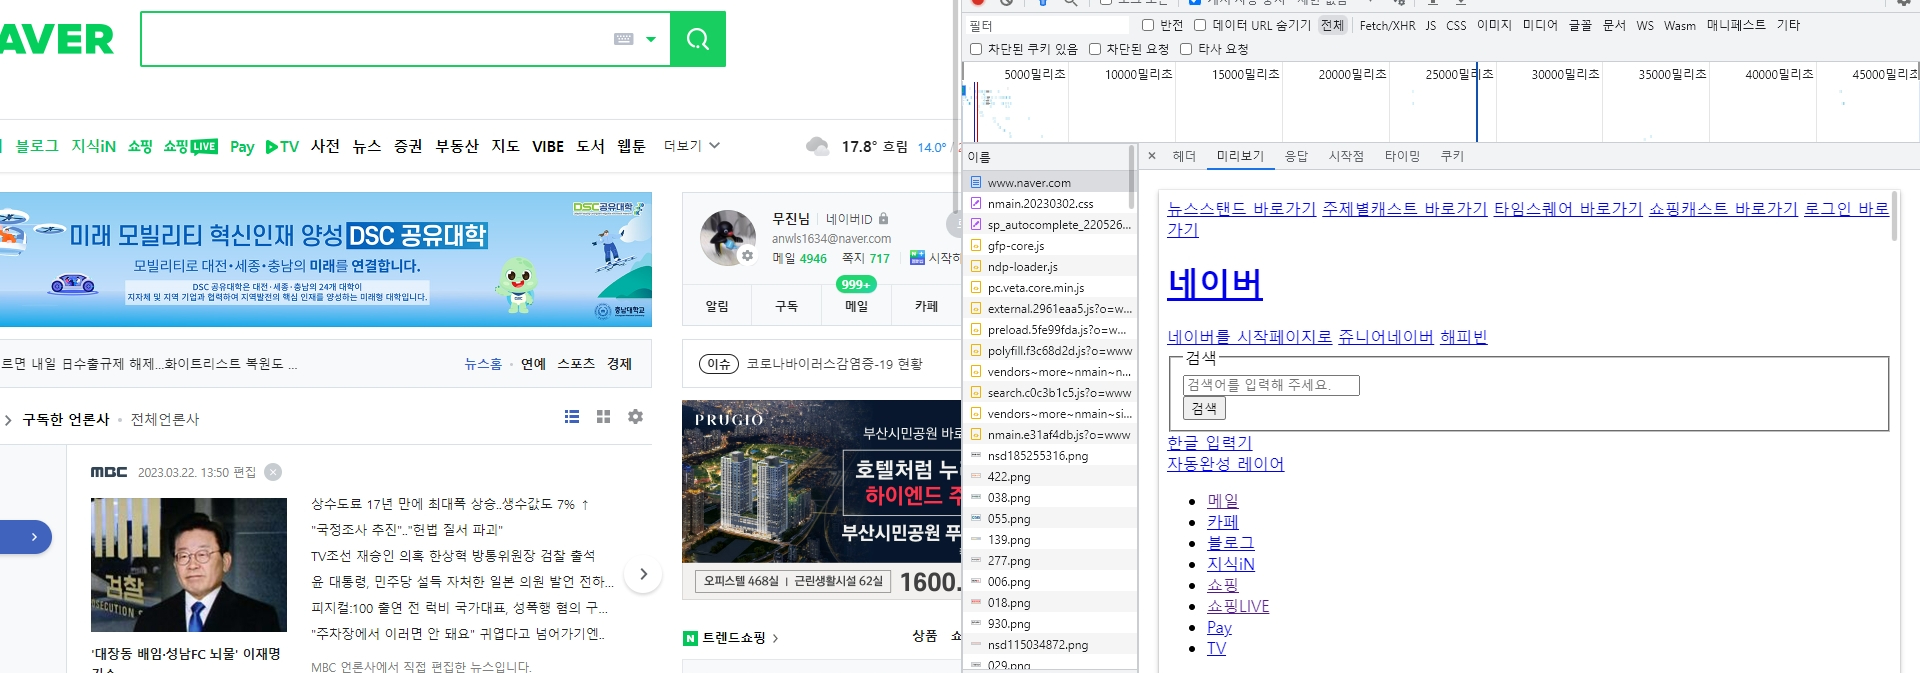

**예시 Url**

http://news.naver.com:80/main/read.nhn? mode=LSD&mid=shm&sid1=105&oid=001&aid=0009847211#da_727145

• https:// - Protocol(프로토콜)     : 규칙

• news - Sub Domain (도메인)   : 서버 컴퓨터 까지의 경로를 찾아준다.

• naver.com - Domain

• 80 - port                             

: 서버에서 웹서버(WAS)에 요청이 가는지 DB에 요청이 가는지 모른다. 그걸 결정해주는 게 **포트**. 

(주로 80 , 443 포트를 사용합니다. 포트는 생략이 가능합니다. 예를 들어 아파트는 찾아갔는데 동, 호수를 찾는 과정이 포트)

• /main/ - path                              : main 은 디렉토리에 해당합니다. 

• read.nhn - page                         : page = file 이기도 합니다.

• ?mode=LSD&mid=shm&sid1=105&oid=001&aid=0009847211 - query (쿼리) 

 : aid (아티클 아이디) 뒤에 나오는 숫자에 저장된 데이터를 가져옵니다.

• #da_727145 - fragment           

: 자주 사용 되진 않는다. 어떤 위치의 화면을 보여줄 지 정해주는 것이 fragment  / 목차를 생각하면 됩니다.

http://news.naver.com:80/main/read.nhn? 까지가 서버에 접속해 파일을 다운로드 받는 거 까지 입니다.
aid=0009847211 의 뒤에 숫자를 파이썬으로 받아올 때 변수화해서 원하는 숫자로 바꾸면 그 숫자에 해당하는 데이터를 가져온다.

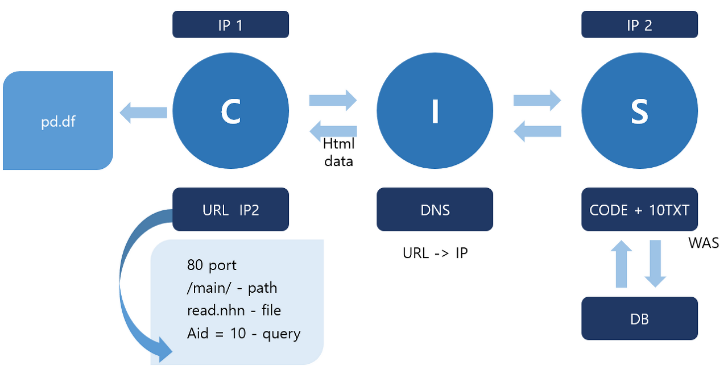

                       ----------------------request--------------------->
클라이언트 (브라우저)   < = >   인터넷  < = >    서버(웹 어플리케이션 서버)

                      <---------------------reponse---------------------

* url을 입력하면 인터넷이  DNS 서버(url -> ip 주소로 바꿔줍니다.)

* 서버 컴퓨터를 찾아가는데 iP 주소가 필요한 겁니다.

* url 에 따라서 요청 되는 서버컴퓨터가 달라진다.


## GET / POST

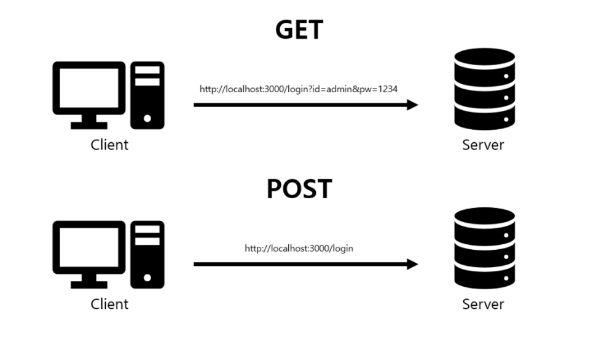

Get : 데이터를 URL에 포함하여 전달(주로 리소스 요청에 사용 - 검색)

- **URL에 쿼리 스트링(데이터)을 붙여서 서버에 전송**
- **데이터를 Header(헤더)에 포함하여 전송**
- **URL에 정보들이 그대로 노출되기 때문에 POST 방식보다 상대적으로 보안에 취약**
- **캐싱이 가능**



***캐싱(Caching)이란?***

***캐싱이란 한번 접근 후 또 요청할 시 빠르게 접근하기 위해 레지스터에 데이터를 저장시켜 놓는 것***

Post : 데이터를 Form data에 포함하여 전달(주로 로그인에 사용)

- **데이터들을 URL뒤에 붙여서 서버로 보내는 것이 아닌 Body에 담아서 전송**
- **요청 헤더의 Content-Type에 콘텐츠 타입을 명시**
- **데이터들이 URL에 노출되지 않기 때문에 GET 방식보다 상대적으로 보안적**

## Cookie & Session & Cache

**Cookie**
* Client에 저장하는 문자열 데이터로 도메인 별로 따로 저장
*  로그인 정보, 내가 봤던 상품 정보, 팝업 다시보지 않음
* 하나의 클라이언트에 300개, 도메인당 20개, 쿠키 하나당 4Kbyte

  * 광고에서 주로 쓰입니다.
  * 하드디스크에 브라우저화 해서 저장된다.
  * 아이디 비밀번호도 쿠키에 저장된다.

---------------------------
 **Session**
* Server에 저장하는 객체 데이터, 브라우져와 연결시 Session ID 생성
* Session ID를 Cookie에 저장함으로 로그인 연결 유지
* 같은 브라우져로 같은 서버에 접속하면 Session ID가 같음
* 로그인 연결 정보, 원하는 객체 데이터

  * 간단하게 말하면 접속정보 , 연결정보 이다.
  * 클라이언트 쪽과 서버 쪽에도 연결 하기 위해선 정보가 필요한데, 그때 쓰인다.
  * 컴퓨터를 끄게 되면, 클라이언트에는 세션이 없지만, 서버에서 세션을 가지고 있기 때문에
  * 다시 컴퓨터를 키면 서버에서 세션을 가지고 있기 때문에 자동로그인 등이 된다.
--------------------------
 **Cache**
* Client나 Server의 메모리에 저장하여 빠르게 데이터를 가져오는 목적의 저장소

--------------------------------
**HTTP Status Code**
상태 코드

서버와 클라이언트가 데이터를 주고 받으면 주고 받은 결과로 상태 코드를 확인할수 있다.

* 2xx - success : 성공코드
* 3xx - redirection (browser cache)         
* 4xx - request error : 요청에러
* 5xx - server error 

## 웹 크롤링 방법

웹페이지의 종류
* 동적페이지
  * 동적 페이지 html 의 url을 통해 JSON형식의 데이터를 받고 request를 보내 response를 받는다. 이때 url은 변하지 않는다.

* 정적페이지
  * 정적 페이지 html 의 url1을 통해
HTML형식의 url2를 받고 request를 보내 response를 받는다.
이때 beautifulsoup의 css-selection을 활용한다.

requests 이용
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

크롤링 방법에 따른 속도
- requests json > requests html > selenium

💡 크롤링 절차
1. 웹서비스 분석 : URL 알아낸다. 이걸 위해 개발자도구를 사용한다.
2. request(URL) > response(DATA) : DATA(json(str), html(str))
3. DATA(json(str) 동적페이지) >  list, dict (parsing : 데이터의 형태를 바꿔주는 것) >  DataFrame : csv, excel 로 저장
즉, URL > DATA > DataFrame 을 만들어 파이썬에서 활용하기 위한 절차

### 정적 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지

#### 1. API를 이용한 공공데이터 가져오기

In [5]:
import urllib.request 
import json 
import pandas as pd 

https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

1) 인증키 신청

2) 미리보기의 샘플 URL 확인

3) 아래와 같이 key / start / end 적기

In [6]:
# 인증키와 주소
key = '6d59486268616e7739377564654f79'
start = 1
end = 600
url = f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/{start}/{end}/20230214'

# 데이터 가져오기
response = urllib.request.urlopen(url) 
json_str = response.read().decode('utf-8')

# JSON으로 변환
json_object = json.loads(json_str)

# 데이터프레임으로 변환
subway = pd.json_normalize(json_object['CardSubwayStatsNew']['row'])

# 확인
subway.shape

(600, 6)

In [7]:
subway.head()

,USE_DT,LINE_NUM,SUB_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20230214,1호선,서울역,54584.0,51511.0,20230217
1,20230214,1호선,시청,27436.0,27538.0,20230217
2,20230214,1호선,종각,44288.0,43480.0,20230217
3,20230214,1호선,종로3가,28906.0,26610.0,20230217
4,20230214,1호선,종로5가,26362.0,25812.0,20230217


#### 2. 통합검색어 트렌드 api


0. request token 얻기
- https://developers.naver.com
1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
2. app_key를 이용해서 데이터 가져오기
- 서비스 : https://datalab.naver.com/keyword/trendSearch.naver
- 내 애플리케이션 > dss 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드

In [8]:
CLIENT_ID, CLIENT_SECRET = "KcavGNB3lps84cp5kzJp", "CpZgLBr_NB"

In [9]:
# 1. URL
url = "https://openapi.naver.com/v1/datalab/search"

In [10]:
# 2. request > response
params = {
    "startDate": "2018-01-01",
    "endDate": "2022-01-31",
    "timeUnit": "month",
    "keywordGroups": [
        {"groupName": "트위터", "keywords": ["트위터", "트윗"]},
        {"groupName": "페이스북", "keywords": ["페이스북", "페북"]},
        {"groupName": "인스타그램", "keywords": ["인스타그램", "인스타"]},
    ]
}

In [11]:
headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET,    
}

In [12]:
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [13]:
# 3. parsing
datas = response.json()["results"]

In [14]:
dfs = []
for data in datas:
    df = pd.DataFrame(data["data"])
    df["title"] = data["title"] # 트위터, 페이스북, 인스타그램
    dfs.append(df)

In [15]:
# 4. preprocessing

In [16]:
result_df = pd.concat(dfs, ignore_index=True)
result_df.tail(2)

,period,ratio,title
145,2021-12-01,22.87539,인스타그램
146,2022-01-01,22.08050,인스타그램


In [17]:
pivot_df = result_df.pivot("period", "title", "ratio")
pivot_df.columns = ["instagram", "twitter", "facebook"]
pivot_df.tail(2)

,instagram,twitter,facebook
period,,,
2021-12-01,22.87539,21.55931,27.23295
2022-01-01,22.08050,21.94339,25.93933


In [18]:
# 5. visualization

In [19]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [20]:
import matplotlib.pyplot as plt

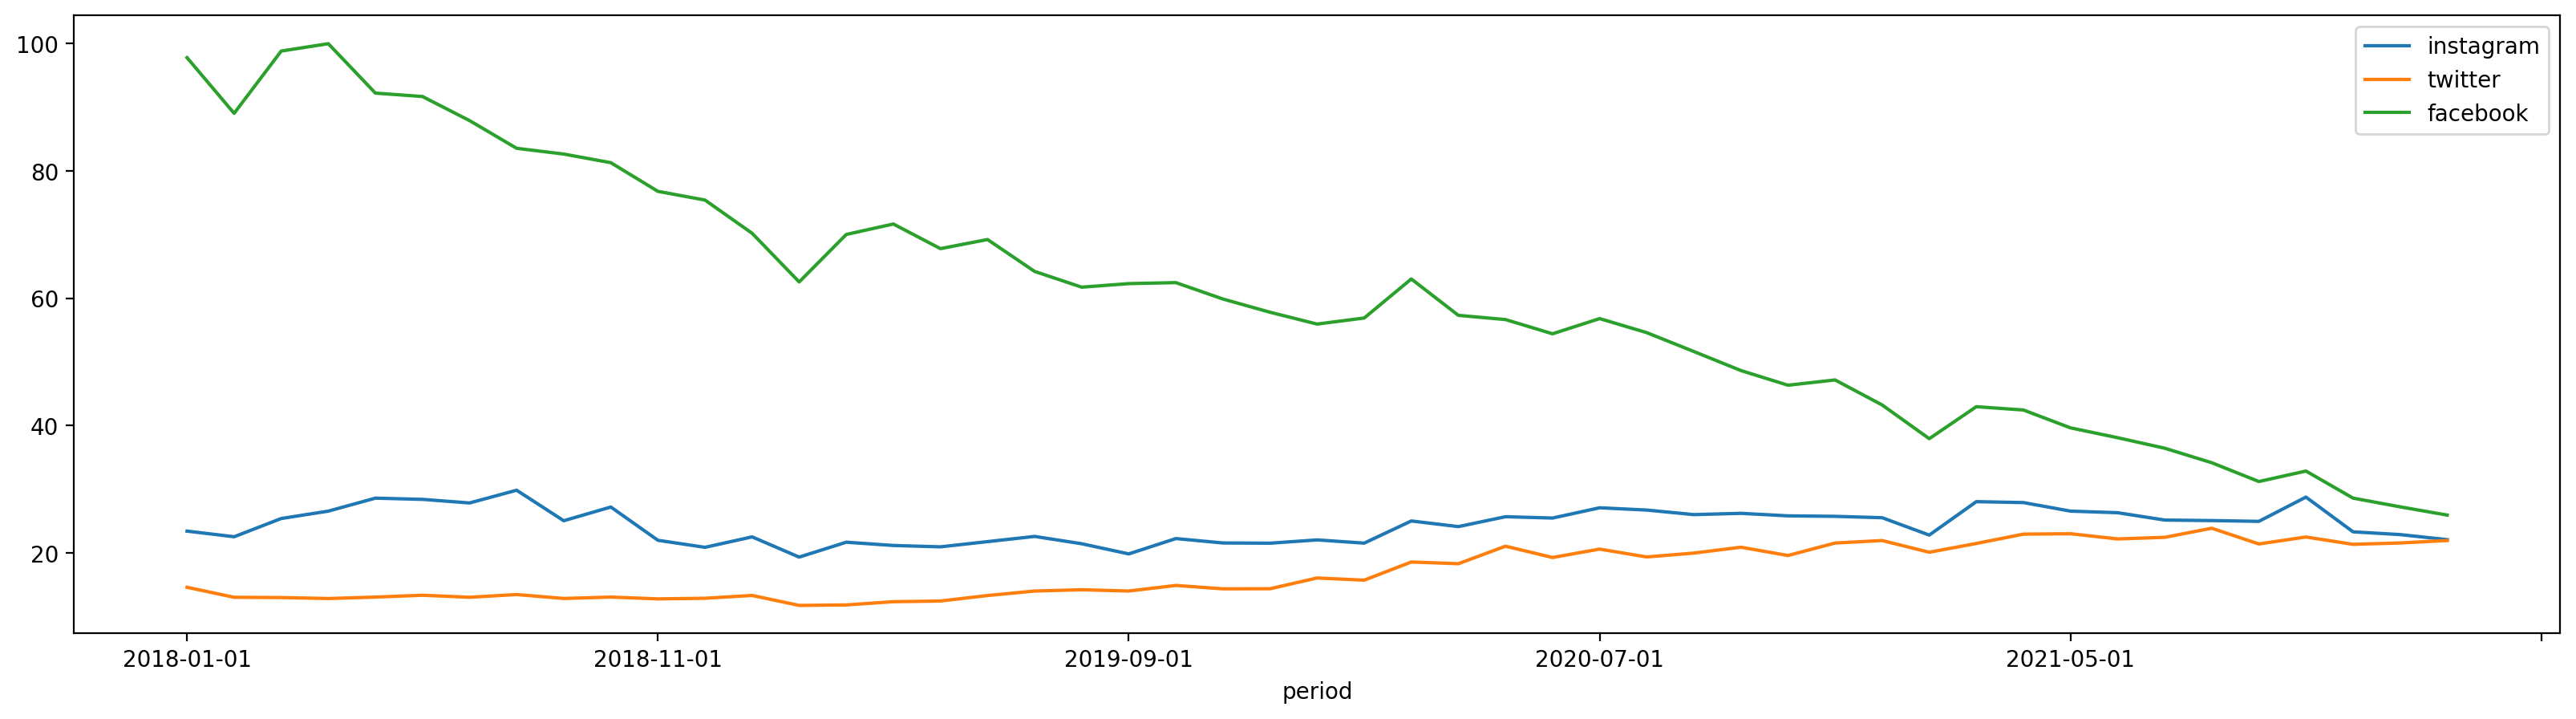

In [21]:
pivot_df.plot(figsize=(20, 5))
plt.legend(loc=0)
plt.show()

### 동적 페이지 : 웹 브라우저에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### 필요 개념 : HTML / CSS

In [22]:
%%html
<div class="contants">
    <p class == 'no1'>data1</p>
    <p class == 'no2'>data2</p>
    <div id="wrap" class="txt">
        <p class='txt no1'>data3</p>
        <p class='txt no2'>data4</p>
        <p class='txt no3'>data5</p>
        <div>
            <p>data6</p>
        </div>
    </div>
</div>

* HTML : 웹페이지의 화면을 구성하는 코드
  * 구성요소 : Document > Element > Tag(<> </>) > Attribute(id, class) > Text
  * Tag 종류 : p(한줄의 문자열), span(한블럭의 문자열), ul, li(리스트 문자열), div, a(href) (링크), img(src)

* CSS - Selector : HTML의 Element를 선택하기 위한 코드
  * Tag : p - data1, data2, data3, data4, data5, data6
  * *id : #wrap - data3, data4, data5
  * *class : .txt - data3, data4, data5
  *         .no2 - data4 / .no3 - data5
  * :not() : .txt:not(.no2) - data3, data5
  * :nth-child - .txt:nth-child(2) - data4 (data2 / data4 - nth-child(2) 해당 > .txt에 해당하는 값 : data4)

* 계층적 구조로 선택
  * #wrap > p (id = wrap > p에 해당하는 한단계 낮은 값 전체 출력) - data3, data4, data5
  * #wrap p (모든 하위 Element를 선택 '>'와의 차이) - data3, data4, data5, 'data6'
  * div.txt : div class이름 txt 찾기 > .txt.no2 : data4

#### Zigbang 원룸 매물 데이터 수집

In [23]:
import requests
import pandas as pd

* 절차
  * 동이름으로 위도 경도 구하기
  * 위도 경도로 geohash 알아내기
  * geohash로 매물 아이디 가져오기
  * 매물 아이디로 매물 정보 가져오기

In [24]:
# 1. 동이름으로 위도 경도 구하기

In [25]:
addr = "망원동"
url = f"https://apis.zigbang.com/v2/search?leaseYn=N&q={addr}&serviceType=원룸"
response = requests.get(url)
data = response.json()["items"][0]
lat, lng = data["lat"], data["lng"]
lat, lng

(37.556785583496094, 126.9013442993164)

In [26]:
# 2. 위도 경도로 geohash 알아내기

In [27]:
# install geohash2
# !pip install geohash2

In [28]:
!pip install geohash2

In [29]:
import geohash2

In [30]:
# precision이 커질수록 영역이 작아짐
geohash = geohash2.encode(lat, lng, precision=5)
geohash

'wydjx'

In [31]:
# 3. geohash로 매물 아이디 가져오기

In [32]:
url = f"https://apis.zigbang.com/v2/items?deposit_gteq=0&domain=zigbang\
&geohash={geohash}&needHasNoFiltered=true&rent_gteq=0&sales_type_in=전세|월세\
&service_type_eq=원룸"
response = requests.get(url)
datas = response.json()["items"]
# len(datas), datas[0]
ids = [data["item_id"] for data in datas]
len(ids), ids[:5]

(685, [35678559, 35815598, 35916837, 35505939, 35813586])

In [33]:
# 4. 매물 아이디로 매물 정보 가져오기

In [34]:
# 1000개 넘어가면 나눠서 수집해야 함
url = "https://apis.zigbang.com/v2/items/list"
params = {
    "domain": "zigbang",
    "withCoalition": "true",
    "item_ids": ids
}
response = requests.post(url, params)
response

<Response [200]>

In [35]:
datas = response.json()["items"]
df = pd.DataFrame(datas)
df.tail(2)

,section_type,item_id,images_thumbnail,sales_type,sales_title,deposit,rent,size_m2,공급면적,전용면적,...,status,service_type,tags,address1,address2,address3,manage_cost,reg_date,is_new,contract
683,None,35873394,https://ic.zigbang.com/ic/items/35873394/1.jpg,월세,월세,1000,130,45.66,"{'m2': 45.66, 'p': '13.8'}","{'m2': 30.35, 'p': '9.2'}",...,True,오피스텔,[],서울시 마포구 중동,None,None,10,2023-03-21T13:17:28+09:00,True,
684,None,35909369,https://ic.zigbang.com/ic/items/35909369/1.jpg,월세,월세,1000,130,42.98,"{'m2': 42.98, 'p': '13'}","{'m2': 29.75, 'p': '9'}",...,True,오피스텔,[],서울시 마포구 중동,None,None,8,2023-03-20T11:05:09+09:00,False,


In [36]:
# 필요한 컬럼만 필터링
columns = ["item_id", "sales_type", "deposit", "rent", "size_m2", "floor", "building_floor",
           "address1", "manage_cost"]
filtered_column_df = df[columns]
filtered_column_df.tail(2)

,item_id,sales_type,deposit,rent,size_m2,floor,building_floor,address1,manage_cost
683,35873394,월세,1000,130,45.66,고,6,서울시 마포구 중동,10
684,35909369,월세,1000,130,42.98,저,6,서울시 마포구 중동,8


In [37]:
# 주소에 망원동이 있는 데이터만 필터링
result_df = filtered_column_df[filtered_column_df["address1"].str.contains("망원동")]
result_df = result_df.reset_index(drop=True)
result_df.tail(2)

,item_id,sales_type,deposit,rent,size_m2,floor,building_floor,address1,manage_cost
90,35912577,월세,1000,80,44.46,2,3,서울시 마포구 망원동,2
91,35944631,전세,19000,0,32.30,3,5,서울시 마포구 망원동,3


#### Gmarket 베스트 상품 200개 데이터 수집

In [38]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [39]:
# 1. URL 찾기

In [40]:
url = 'https://corners.gmarket.co.kr/bestsellers'

In [41]:
# 2. request > response : str(html)

In [42]:
response = requests.get(url)
response

<Response [200]>

In [43]:
# 3. bs > DataFrame

In [44]:
dom = BeautifulSoup(response.text, 'html.parser')
# CSS selector
selector = '#gBestWrap > div > div:nth-child(5) > div > ul > li'
elements = dom.select(selector)
len(elements)

200

In [45]:
element = elements[0]
data = {
    'title' : element.select_one('.itemname').text, # 제목
    'link' : element.select_one('.itemname').get('href'), # 링크
    'o_price' : element.select_one('.o-price').text, # 정가
    'S_price' : element.select_one('.s-price').text.strip().split('\n')[0], # 할인가
    'img' : 'http://' + element.select_one('img').get('data-original') # 이미지 > 밑의 사진들은 이미지 로딩 X - data-orginal로 수집
}
data

{'title': '(쌀가게) (신세계경기점)[주문폭증/순차출고]  쌀가게  수향미 (특등급) 10kg',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2394151837&ver=638150984546174651',
 'o_price': '정가36,000원',
 'S_price': '할인가34,200원',
 'img': 'http:////gdimg.gmarket.co.kr/2394151837/still/300?ver=2023032216'}

In [46]:
items = []
for element in elements:
    items.append({
    'title' : element.select_one('.itemname').text, # 제목
    'link' : element.select_one('.itemname').get('href'), # 링크
    'o_price' : element.select_one('.o-price').text, # 정가
    'S_price' : element.select_one('.s-price').text.strip().split('\n')[0], # 할인가
    'img' : 'http:' + element.select_one('img').get('data-original') # 이미지 > 밑의 사진들은 이미지 로딩 X - data-orginal로 수집
        })
items[:3]

[{'title': '(쌀가게) (신세계경기점)[주문폭증/순차출고]  쌀가게  수향미 (특등급) 10kg',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=2394151837&ver=638150984546174651',
  'o_price': '정가36,000원',
  'S_price': '할인가34,200원',
  'img': 'http://gdimg.gmarket.co.kr/2394151837/still/300?ver=2023032216'},
 {'title': '[리챔]리챔 오리지널 200g 10캔',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=2809510617&ver=638150984546174651',
  'o_price': '정가25,900원',
  'S_price': '할인가22,900원',
  'img': 'http://gdimg.gmarket.co.kr/2809510617/still/300?ver=2023032216'},
 {'title': '[KFC](선물하기 특가) KFC 3만원권',
  'link': 'http://item.gmarket.co.kr/Item?goodscode=2839554771&ver=638150984546174651',
  'o_price': '정가30,000원',
  'S_price': '할인가25,800원',
  'img': 'http://gdimg.gmarket.co.kr/2839554771/still/300?ver=2023032216'}]

In [47]:
df = pd.DataFrame(items)
df.tail(2)

,title,link,o_price,S_price,img
198,[비첸향](대구신세계)미니이지포크 Mini EZ Pork 500g,http://item.gmarket.co.kr/Item?goodscode=17551...,"정가48,000원","할인가45,600원",http://gdimg.gmarket.co.kr/1755148947/still/30...
199,[베네통키즈]갤러리아 23S/S베네통키즈 베네통 플레이 티셔츠 상하세트(QATS16...,http://item.gmarket.co.kr/Item?goodscode=28054...,"정가40,000원","할인가29,600원",http://gdimg.gmarket.co.kr/2805411542/still/30...


### Selenium

https://www.selenium.dev
* 자동화를 목적으로 만들어진 다양한 브라우져와 언어를 지원하는 라이브러리
* 크롬 브라우져 설치
* 크롬 브라우져 드라이버 다운로드 (크롬 브라우져와 같은 버전)
* 다운로드한 드라이버 압축 해제
* chromedriver, chromedriver.exe 생성
* windows : 주피터 노트북 파일과 동일한 디렉토리에 chromedriver.exe 파일 업로드
* mac : sudo cp ~/Download/chromedirver /usr/local/bin

#### 사용 방법

In [48]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By

In [50]:
driver = webdriver.Chrome()

In [51]:
# 페이지 이동
driver.get("https://daum.net")

In [52]:
# 브라우져 사이즈 조절
driver.set_window_size(200, 600)

In [53]:
# 브라우져 스크롤 조절
driver.execute_script("window.scrollTo(200, 300);")

In [54]:
# alert 다루기
driver.execute_script("alert('hello selenium!!!');")

In [55]:
alert = driver.switch_to.alert
alert.accept()

In [57]:
# 문자열 입력
driver.find_element(By.CSS_SELECTOR, "#q").send_keys("셀레니움")

In [58]:
# 검색 버튼 클릭
driver.find_element(By.CSS_SELECTOR, '.inner_search > .ico_pctop.btn_search').click()

In [59]:
# 브라우져 종료
driver.quit()

#### TED 텍스트 데이터 가져오기

* TED 사이트 : https://www.ted.com

In [60]:
# 브라우져를 실행하여 테드 사이트 열기
driver = webdriver.Chrome()
driver.get("https://www.ted.com/talks")

In [61]:
# CSS Selector를 이용하여 HTML 태그와 태그 사이의 text 데이터 가져오기
driver.find_element(By.CSS_SELECTOR, ".talks-header__title").text

'4200+ talks to stir your curiosity'

In [62]:
# 제목 데이터 가져오기
contents = driver.find_elements(By.CSS_SELECTOR, "#browse-results > .row > .col")
len(contents)

36

In [63]:
# 가장 처음 텍스트 데이터 가져오기
contents[0].find_element(By.CSS_SELECTOR, '.media__message .ga-link').text

'A day in the Islamic Golden Age'

In [64]:
# 전체 제목 데이터 가져오기
titles = []
for content in contents:
    title = content.find_element(By.CSS_SELECTOR, '.media__message .ga-link').text
    titles.append(title)
titles[:3], len(titles)

(['A day in the Islamic Golden Age',
  'What happens to gas stations when the world goes electric?',
  "How to discover your business's competitive advantage"],
 36)

In [65]:
# 셀렉트 박스를 선택후 데이터 가져오기
# 이벤트 발생 기능(값 입력, 클릭 이벤트등)은 화면에 해당 엘리먼트가 보여야 합니다.
# 한국어 선택
driver.find_element(By.CSS_SELECTOR, '#languages [lang="ko"]').click()
time.sleep(1)

In [66]:
# 전체 제목 데이터 가져오기
contents = driver.find_elements(By.CSS_SELECTOR, "#browse-results > .row > .col")
titles = []
for content in contents:
    title = content.find_element(By.CSS_SELECTOR, '.media__message .ga-link').text
    titles.append(title)
titles[-3:]

['경청하는 사람이 알아야 할 네 가지 원칙',
 '살아있는 고래의 가치와 경제가 자연을 보호해야 하는 이유',
 '한 도시를 갈라놓은 두 형제의 싸움 - 제이 반 바벨과 도미닉 패커']

In [67]:
# 링크 데이터 크롤링 (속성(attribute)값 가져오는 방법)
links = []
for content in contents:
    link = content.find_element(By.CSS_SELECTOR, '.media__message .ga-link').get_attribute("href")
    links.append(link)
links[-3:]

['https://www.ted.com/talks/ted_ed_4_things_all_great_listeners_know?language=ko',
 'https://www.ted.com/talks/ralph_chami_what_a_living_whale_is_worth_and_why_the_economy_should_protect_nature?language=ko',
 'https://www.ted.com/talks/jay_van_bavel_and_dominic_packer_the_sibling_rivalry_that_divided_a_town?language=ko']

In [68]:
driver.quit()

#### 맥도날드 리뷰 크롤링

In [74]:
!pip3 install google-play-scraper

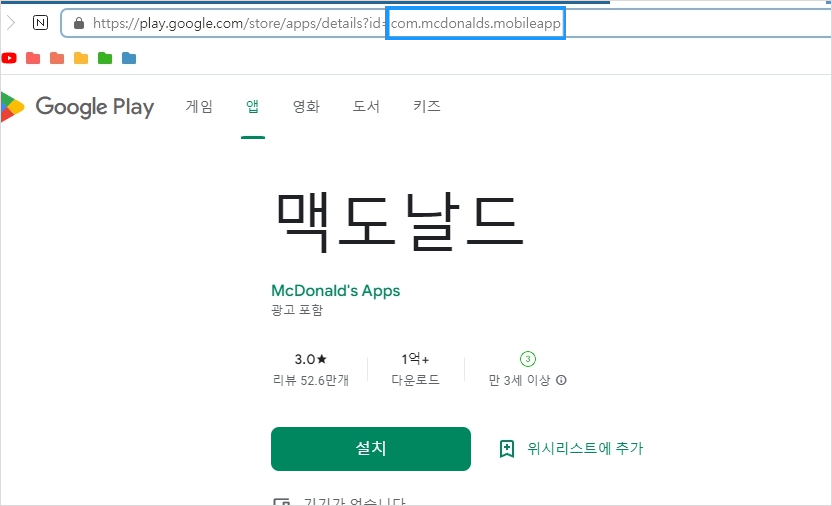

In [82]:
# 라이브러리
import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all

# url 입력
url_mcdonalds = "com.mcdonalds.mobileapp"


# 맥도날드 앱 정보 크롤링
app_mcdonalds = app(url_mcdonalds,
                  lang = "ko", # defaults = "en"
                  country = "kr" # defaults to "us"
                 )

# 데이터프레임 변환
df_app_mcdonalds = pd.DataFrame.from_dict(app_mcdonalds, orient = "index").head(3)

# 맥도날드 앱 리뷰 크롤링
review_mcdonalds = reviews_all(url_mcdonalds,
                             sleep_milliseconds = 100,
                             lang = "ko",# default = "en"
                             country = "kr", # default = "US"
                             sort = Sort.MOST_RELEVANT, # Sort.NEWEST
                             filter_score_with = None # None means All score
                            )

# 데이터프레임 변환
df_review_mcdonalds = pd.DataFrame(review_mcdonalds)
df_review_mcdonalds.tail(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
6166,8c767c2b-6566-4a6b-9162-cb91e22829b5,이미선,https://play-lh.googleusercontent.com/a/AGNmyx...,박서연,1,0,None,2021-07-04 09:58:07,None,NaT


In [83]:
df_review_mcdonalds.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,ad53ed51-e5b9-4bae-9b00-fe84c23ea88e,T P,https://play-lh.googleusercontent.com/a-/ACB-R...,"할인 너무 좋고, 맥도날드 너무 맛있습니다. 정말 애용하고 사랑하는 프렌차이즈이지만...",5,21,2.58.0,2023-02-21 18:00:03,None,NaT
1,bf3c68c3-e587-4309-b996-1df989fb991d,신준섭,https://play-lh.googleusercontent.com/a/AGNmyx...,솔직히 다 괜찮...는 않네요. 저는 한번이긴한데 쿠폰이 이유없이 (사용유효기한안에...,4,76,2.55.0,2022-12-08 19:59:48,None,NaT
2,5157623f-70f0-4ee2-9d93-dead9d4321d1,강병기,https://play-lh.googleusercontent.com/a/AGNmyx...,이딴걸 어플이라고 만들거면 그냥 안만드는게 나을듯 굳이굳이 만들어서 욕먹고 싶은가....,1,2,2.55.0,2023-03-18 15:25:29,None,NaT
3,f11db550-dbfa-4680-9aea-4edc8ec4c948,지정윤,https://play-lh.googleusercontent.com/a-/ACB-R...,왜? 포인트 적립을 결제하기 전에 합니까? 안그래도 맥도날드 키오스크 엄청 느려서 ...,1,52,2.55.0,2023-01-01 01:48:13,None,NaT
4,ebb8bba9-2a62-4429-a983-beda05dd7e86,김g 1 usuals유리,https://play-lh.googleusercontent.com/a/AGNmyx...,사용하려고 할때 마다 오류나서 제거 후 설치해야 실행되는 앱. 정말 왜 만든건지.....,1,394,None,2021-02-04 18:26:12,None,NaT


In [85]:
df_review_mcdonalds.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [89]:
df_review_mcdonalds.sort_values('thumbsUpCount',ascending = False).head(20)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
31,4d114bed-517a-4a85-9d34-11ac3addfb60,YESUNG LEE,https://play-lh.googleusercontent.com/a-/ACB-R...,몇번 튕겼지만 잘 사용해왔는데..기껏 열심히모은 포인트 사용해서 아이스크림을 구매한...,1,498,2.37.0,2022-03-21 16:52:16,None,NaT
5,23ac2373-c2ed-4244-b303-1708316577d5,정선우,https://play-lh.googleusercontent.com/a/AGNmyx...,"툭하면 원인을 알수없는 이유나 대고는 먹통나고, 별짓을 다 해도 안돼서 설정에서 데...",1,422,2.23.1,2021-07-07 14:09:59,None,NaT
4,ebb8bba9-2a62-4429-a983-beda05dd7e86,김g 1 usuals유리,https://play-lh.googleusercontent.com/a/AGNmyx...,사용하려고 할때 마다 오류나서 제거 후 설치해야 실행되는 앱. 정말 왜 만든건지.....,1,394,None,2021-02-04 18:26:12,None,NaT
8,2fa59c2e-1253-4512-935f-4a8b9d1ade70,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,별점이 낮은건 사람들이 쿠폰 사용을 할줄 몰라서가 아니라 앱이 너무 불안정해서 사용...,1,373,1.5.0,2019-07-01 10:49:10,None,NaT
6,05b41a27-43f0-4924-88b3-8ae378a8dd76,KIM C,https://play-lh.googleusercontent.com/a/AGNmyx...,최악이 어플.. 사용할때마다 지우고 재설치해야 쓸 수 있음 쓰고 나면 바로 어플 안...,1,328,2.16.0,2021-03-15 20:26:56,None,NaT
1071,cb964c47-7ddf-4975-a9b8-3b2b6dc73362,Que,https://play-lh.googleusercontent.com/a/AGNmyx...,어플 사용 주의점 : 맥도날드 가려고 결정하기 전에 어플을 꼭 먼저 실행시켜볼것. ...,1,262,2.24.0,2021-07-17 23:52:57,None,NaT
94,d74e2484-5802-4200-aee2-55156b24527a,JY,https://play-lh.googleusercontent.com/a-/ACB-R...,"보통 귀차나서 리뷰 안남기는데,,이건 뭐..매번 오류가. 업데이트 했는데 계속 다시...",1,242,2.6.0,2020-06-12 09:53:26,None,NaT
530,72de5f4b-fa24-4dab-b7a9-54b567fd7e59,Google 사용자,https://play-lh.googleusercontent.com/EGemoI2N...,"마지막단계에 회원가입을 누르면...다시 어플을 깔아도 계속 "" 설치된 앱의 최신 버...",1,240,2.0.0,2019-08-09 16:09:01,None,NaT
15,1ffd67a5-d3af-41e7-9a41-6f44770bae20,황득하,https://play-lh.googleusercontent.com/a-/ACB-R...,앱을 만들거면 제대로 만들던가 몇년째 운영하면서 로그인 시도만 수백번에 재시도만 계...,1,211,2.30.0,2021-11-15 20:30:11,None,NaT
135,1a134a22-c1b4-4057-86e0-80c897ba455c,Baby Ohh,https://play-lh.googleusercontent.com/a/AGNmyx...,한개도 아까움... 도대체 왜 폰이 구형도 아닌 최신폰인데도 계속 최신버전을 확인하...,1,206,2.13.3,2020-12-23 17:00:45,None,NaT
